In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time
from cycle_gan import cycleGAN 
import opt
import dataloader
import torch
from torch.utils.data import DataLoader
import os

loading the model from saved_models_mountain_small_paintings/latest_net_GenA.pth
loading the model from saved_models_mountain_small_paintings/latest_net_GenB.pth
loading the model from saved_models_mountain_small_paintings/latest_net_DisA.pth
loading the model from saved_models_mountain_small_paintings/latest_net_DisB.pth


<IPython.core.display.Javascript object>


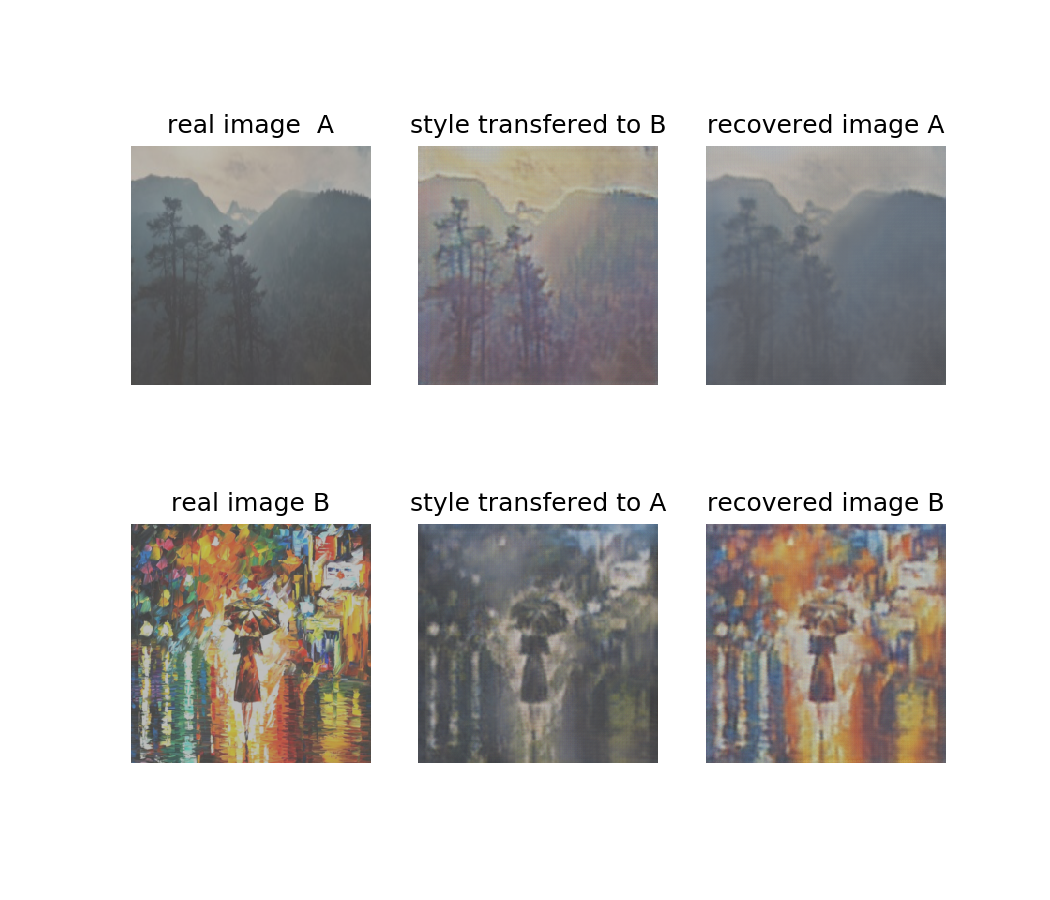

<IPython.core.display.Javascript object>


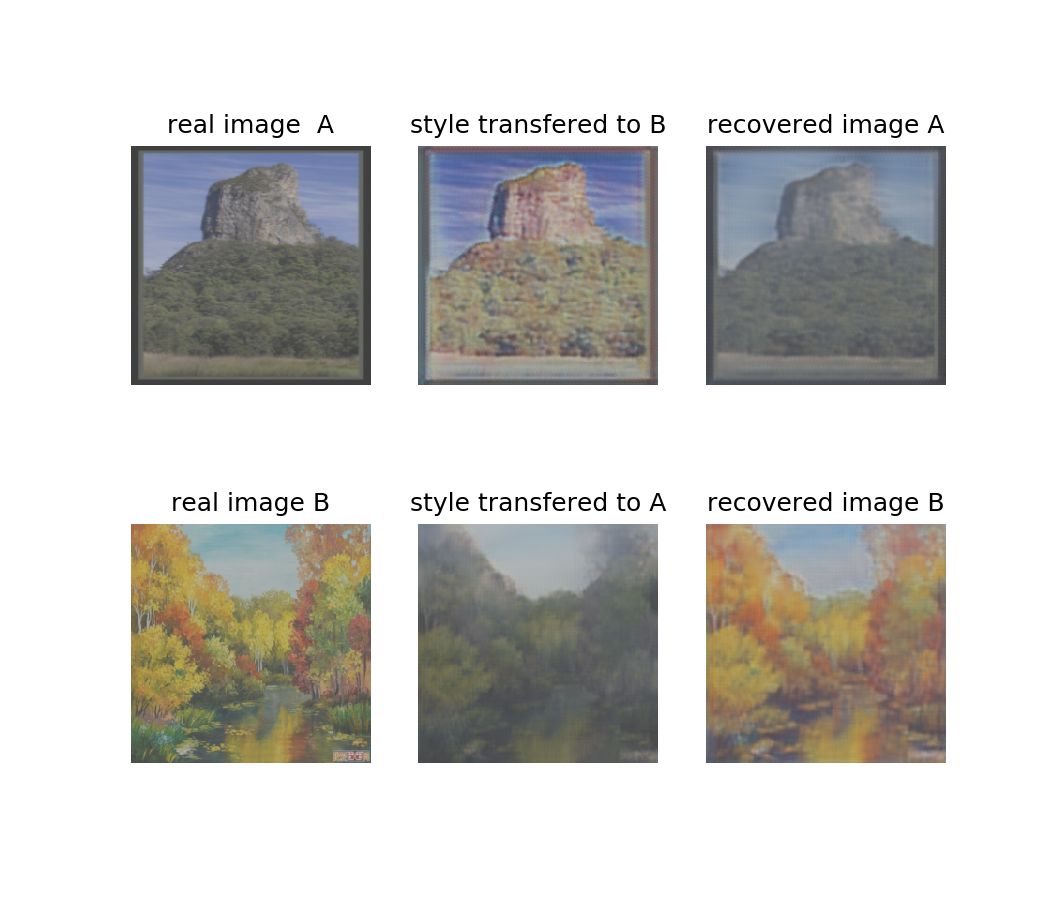

<IPython.core.display.Javascript object>


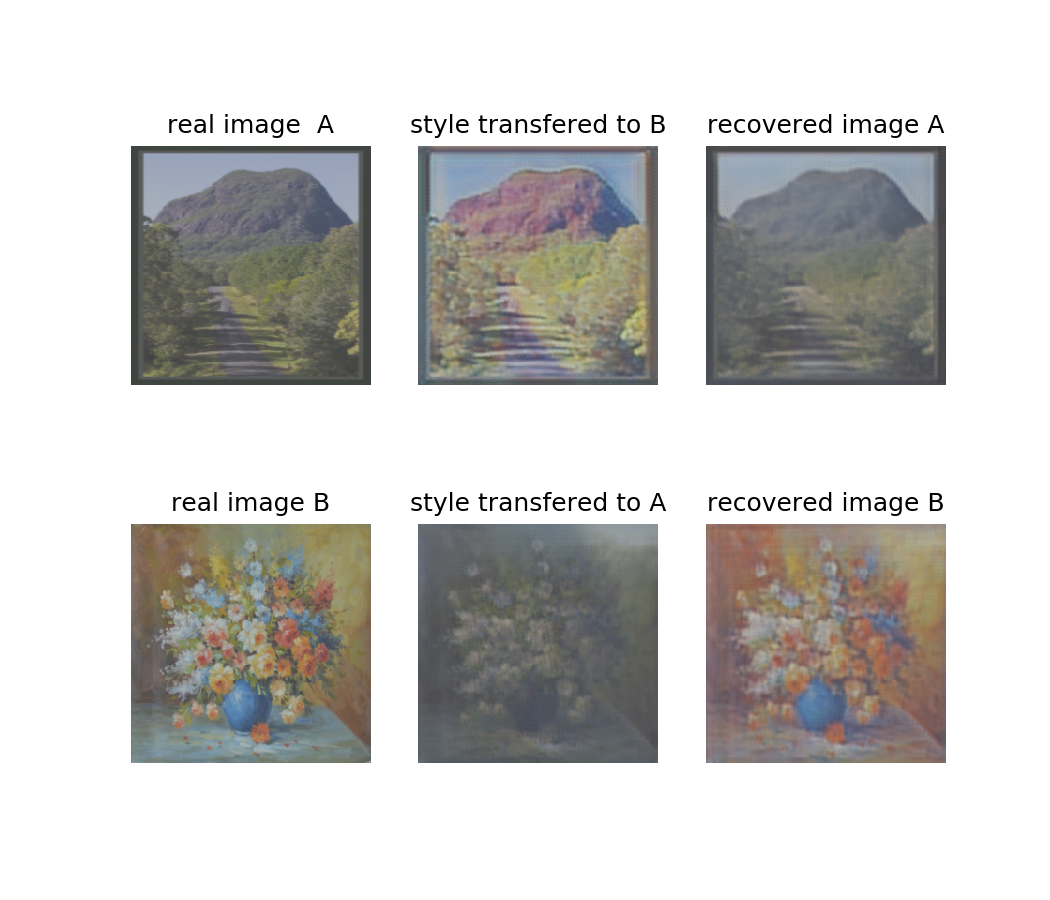

<IPython.core.display.Javascript object>


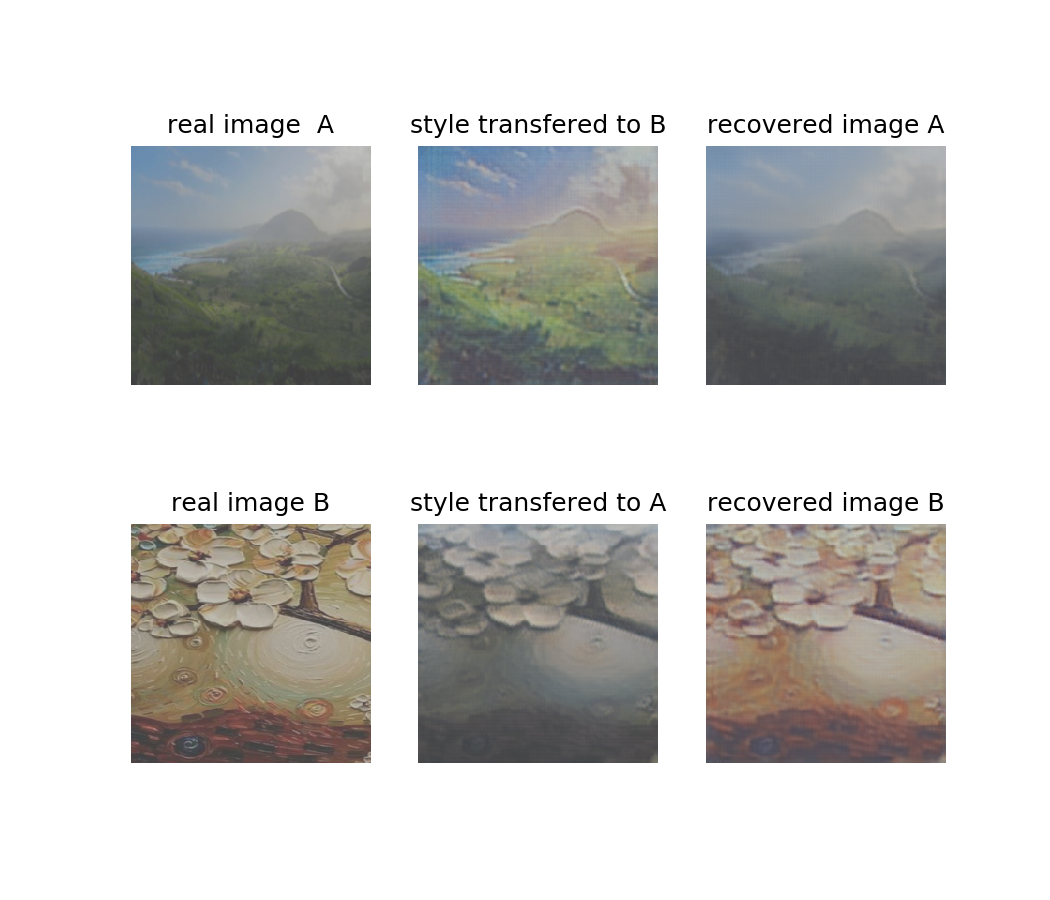

In [3]:
# test
model = cycleGAN(opt)     # create a model given opt.model and other options
epoch = 'latest' # from 10 to 200(interval is 10) or 'latest'
model.load_networks(epoch)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device) 
dataset_path = opt.dataroot
landscape_set = dataloader.GANTransDataset(dataset_path, mode = opt.set_A, image_size = opt.image_size)
style_set = dataloader.GANTransDataset(dataset_path, mode = opt.set_B,image_size = opt.image_size)
landscape_size = len(landscape_set)    # get the number of images in the dataset.
style_size = len(style_set)
batch_size = 1
dataset = dataloader.GANCombinedDataset(landscape_set, style_set)
dataset_loader = DataLoader(dataset, batch_size= 1, shuffle=False)
for i, (real_A, real_B) in enumerate(dataset_loader):
    with torch.no_grad():
        model.set_input(real_A.to(device), real_B.to(device))    
        model.test()           # run inference
        model.show_latest_img()
        plt.show()
    if i == 3: # show 4 pairs of results
        break